Hands-on

Implement Sobel and Canny edge detectors on sample industrial images


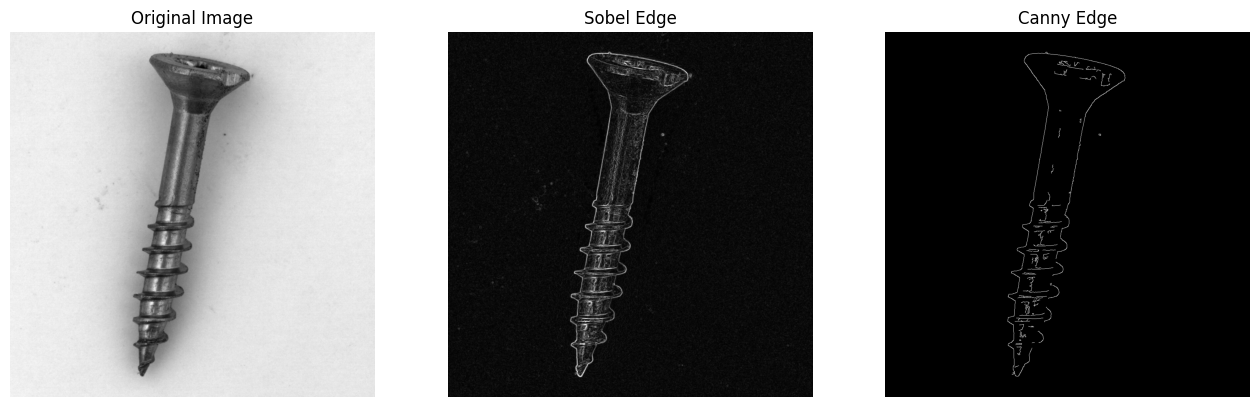

In [21]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('003.png', 0) 

#Sobel Edge Detection
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)
sobel_combined = cv2.convertScaleAbs(sobel_combined)

#Canny Edge Detection
canny_edges = cv2.Canny(img, 100, 200)

titles = ['Original Image', 'Sobel Edge', 'Canny Edge']
images = [img, sobel_combined, canny_edges]

plt.figure(figsize=(16,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()


Apply morphological opening and closing to clean binary masks


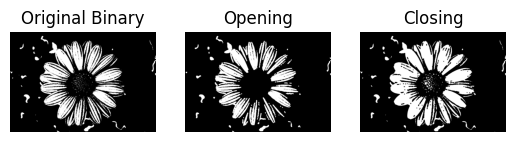

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('flower.png', cv2.IMREAD_GRAYSCALE)

kernel = np.ones((5,5), np.uint8)

opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

titles = ['Original Binary', 'Opening', 'Closing']
images = [img, opening, closing]

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()


Perform defect segmentation using Otsu and adaptive thresholding


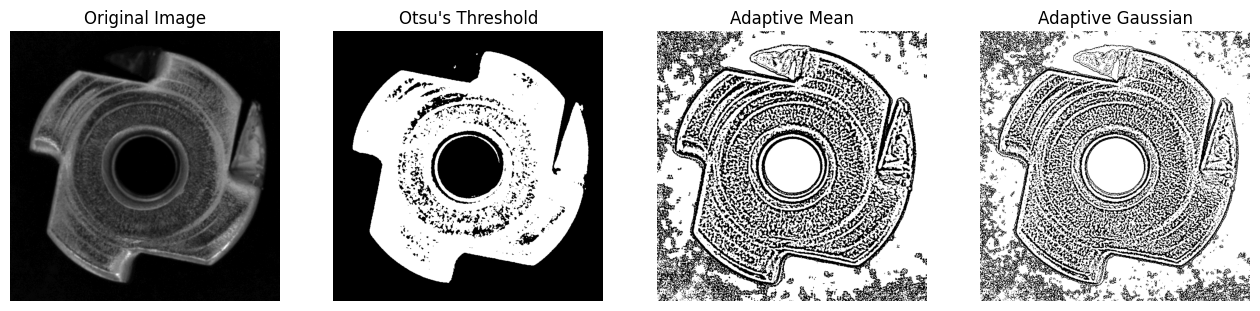

In [18]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('000.png', 0)  # 0 -> grayscale


_, otsu_thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


adaptive_mean = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 11, 2)
adaptive_gauss = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

titles = ['Original Image', "Otsu's Threshold", 'Adaptive Mean', 'Adaptive Gaussian']
images = [img, otsu_thresh, adaptive_mean, adaptive_gauss]

plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()


Extract SIFT/ORB features for part identification or alignment tasks


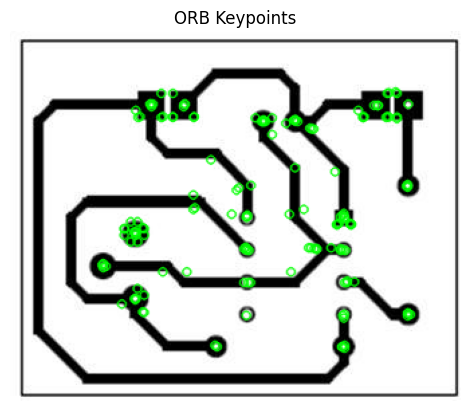

In [17]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('pcblayout.jpg', cv2.IMREAD_GRAYSCALE)

orb = cv2.ORB_create(nfeatures=150)
kp, des = orb.detectAndCompute(img, None)

img_kp = cv2.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)

# Display
plt.imshow(img_kp)
plt.title('ORB Keypoints')
plt.axis('off')
plt.show()




Design of Classical CV Pipelines for Defect Localization and Pattern Matching

In [34]:
import numpy as np
import cv2

img = cv2.resize(cv2.imread('image.png', 0), (0, 0), fx=0.8, fy=0.8)
template = cv2.resize(cv2.imread('pattern.png', 0), (0, 0), fx=0.8, fy=0.8)
h, w = template.shape

methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED,
            cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]

for method in methods:
    img2 = img.copy()

    result = cv2.matchTemplate(img2, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        location = min_loc
    else:
        location = max_loc

    bottom_right = (location[0] + w, location[1] + h)    
    cv2.rectangle(img2, location, bottom_right, 255, 3)
    cv2.imshow('Match', img2)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Assingments

Apply spatial filtering to enhance the surface of an automotive part image and highlight scratches or dents. 


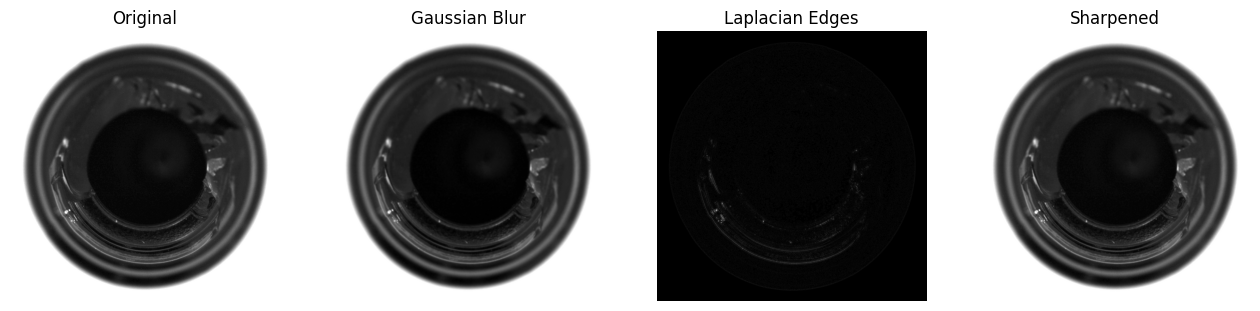

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('002.png', 0)  # 0 -> grayscale


gaussian_blur = cv2.GaussianBlur(img, (5,5), 1.5)

laplacian = cv2.Laplacian(gaussian_blur, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

kernel_sharpen = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
sharpened = cv2.filter2D(gaussian_blur, -1, kernel_sharpen)

titles = ['Original', 'Gaussian Blur', 'Laplacian Edges', 'Sharpened']
images = [img, gaussian_blur, laplacian, sharpened]

plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()


Implement Sobel, Canny, and Laplacian edge detectors on bridge/concrete images to detect cracks. Compare their effectiveness


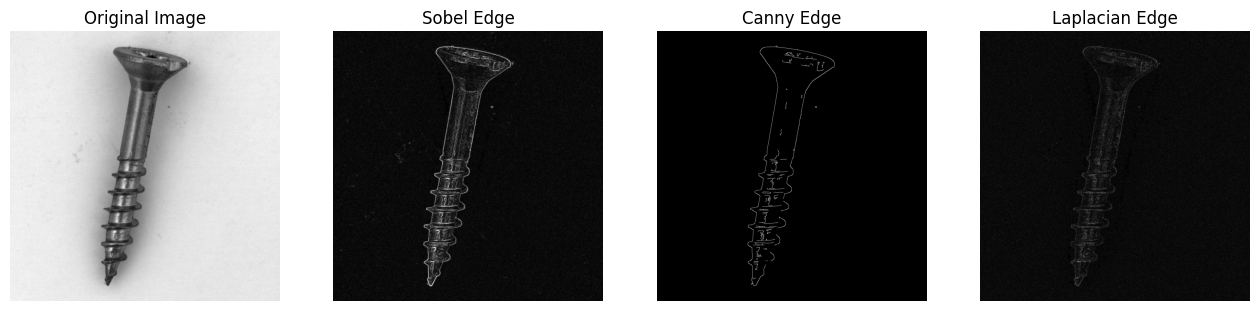

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('003.png', 0)  # 0 -> grayscale

#Sobel Edge Detection
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)
sobel_combined = cv2.convertScaleAbs(sobel_combined)

#Canny Edge Detection
canny_edges = cv2.Canny(img, 100, 200)

#Laplacian Edge Detection 
laplacian = cv2.Laplacian(img, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

# ----- Display results -----
titles = ['Original Image', 'Sobel Edge', 'Canny Edge', 'Laplacian Edge']
images = [img, sobel_combined, canny_edges, laplacian]

plt.figure(figsize=(16,5))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()


Use morphological operations (opening/closing) to isolate defective regions in a fabric image


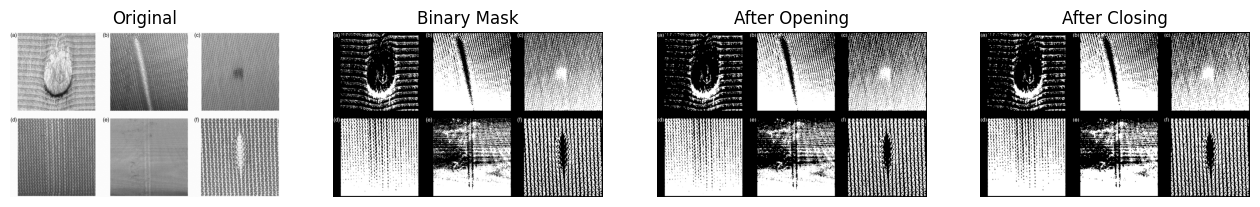

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('fabric.jpg', 0) 

_, binary = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY_INV) 

kernel = np.ones((5,5), np.uint8)

opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

# Display results
titles = ['Original', 'Binary Mask', 'After Opening', 'After Closing']
images = [img, binary, opening, closing]

plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()


Apply global, adaptive, and Otsu thresholding on metal surface images to separate defective vs. non-defective regions. Provide comparative results


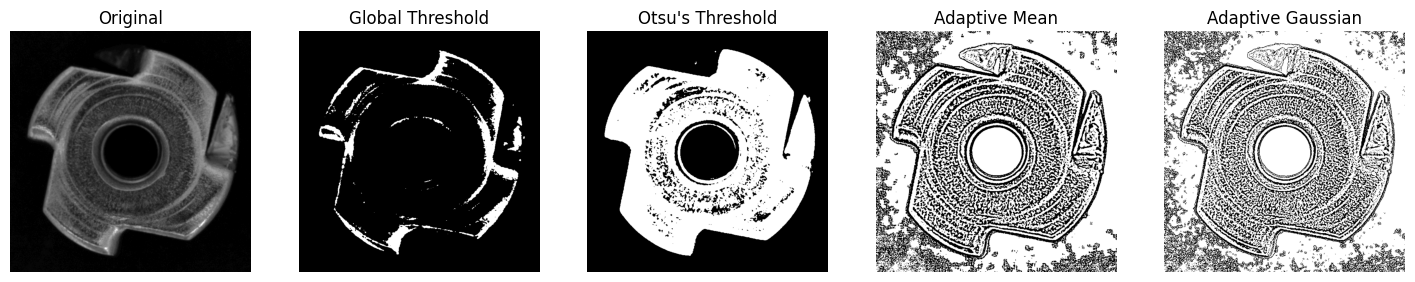

In [13]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('000.png', 0)

_, global_thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

_, otsu_thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

adaptive_mean = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 11, 2)
adaptive_gauss = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 11, 2)

titles = ['Original', 'Global Threshold', "Otsu's Threshold", 'Adaptive Mean', 'Adaptive Gaussian']
images = [img, global_thresh, otsu_thresh, adaptive_mean, adaptive_gauss]

plt.figure(figsize=(18,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()


Develop a color-based thresholding method (HSV space) to classify fruits as ripe or unripe. 

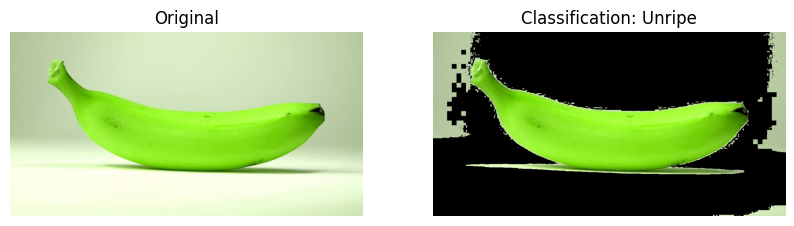

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

ripe_lower = np.array([20, 100, 100])    
ripe_upper = np.array([35, 255, 255])

unripe_lower = np.array([35, 50, 50])    
unripe_upper = np.array([85, 255, 255])

image_files = glob.glob('green-banana.jpg') 

for file in image_files:
    img = cv2.imread(file)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    mask_ripe = cv2.inRange(hsv, ripe_lower, ripe_upper)
    mask_unripe = cv2.inRange(hsv, unripe_lower, unripe_upper)

    ripe_count = cv2.countNonZero(mask_ripe)
    unripe_count = cv2.countNonZero(mask_unripe)

    if ripe_count > unripe_count:
        classification = 'Ripe'
    else:
        classification = 'Unripe'

    result = cv2.bitwise_and(img, img, mask=mask_ripe + mask_unripe)
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title(f'Classification: {classification}')
    plt.axis('off')

    plt.show()


Use connected components analysis on a tablet image to detect missing, broken, or extra objects. Display bounding boxes for identified defects.


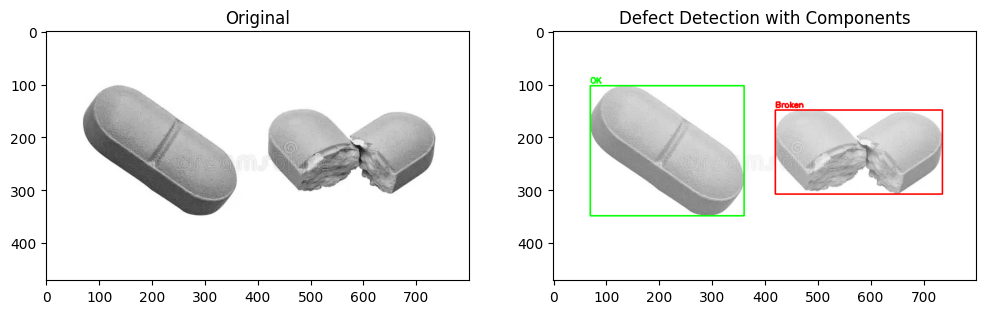

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("tablets.webp", cv2.IMREAD_GRAYSCALE)

blur = cv2.GaussianBlur(img, (5,5), 0)


_, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

if np.sum(thresh == 255) > np.sum(thresh == 0):
    thresh = cv2.bitwise_not(thresh)

kernel = np.ones((3,3), np.uint8)
clean = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(clean, connectivity=8)

output = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

areas = stats[1:, cv2.CC_STAT_AREA]   
normal_area = np.median(areas)

for i in range(1, num_labels): 
    x, y, w, h, area = stats[i]

    component_mask = (labels == i).astype("uint8") * 255
    contours, _ = cv2.findContours(component_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if not contours: 
        continue
    
    perimeter = cv2.arcLength(contours[0], True)
    circularity = 4 * np.pi * area / (perimeter * perimeter + 1e-6)
    aspect_ratio = w / float(h)

    if area < 0.7 * normal_area or circularity < 0.5:
        color = (0,0,255)    
        label = "Broken"
    elif area > 1.5 * normal_area:
        color = (255,0,0)      
        label = "Stuck/Extra"
    else:
        color = (0,255,0)      
        label = "OK"

    cv2.rectangle(output, (x,y), (x+w, y+h), color, 2)
    cv2.putText(output, label, (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(output[:,:,::-1])
plt.title("Defect Detection with Components")

plt.show()

Apply connected component labeling to count defective vs. good solder joints on PCB images. Provide statistics of the results

Total solder joints: 327
Good joints: 36 (11.0%)
Defective joints: 291 (89.0%)


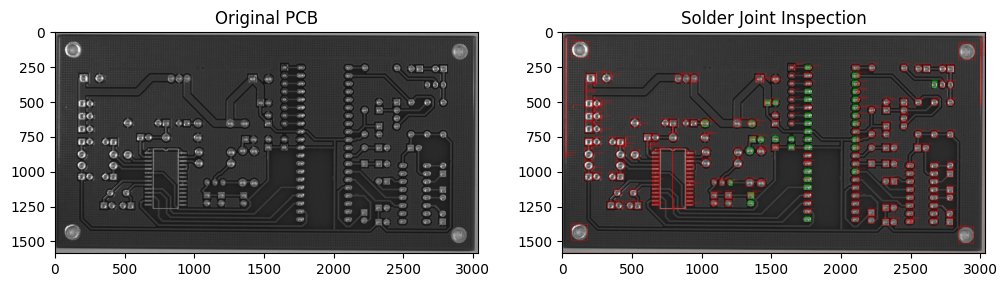

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("pcb.jpg", cv2.IMREAD_GRAYSCALE)

blur = cv2.GaussianBlur(img, (5, 5), 0)

_, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

if np.sum(thresh == 255) > np.sum(thresh == 0):
    thresh = cv2.bitwise_not(thresh)

kernel = np.ones((3, 3), np.uint8)
mask = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask, connectivity=8)

output = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

good_count = 0
defective_count = 0

areas = stats[1:, cv2.CC_STAT_AREA]
normal_area = np.median(areas)


for i in range(1, n_labels): 
    x, y, w, h, area = stats[i]

    comp_mask = (labels == i).astype("uint8") * 255
    contours, _ = cv2.findContours(comp_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not contours:
        continue

    perimeter = cv2.arcLength(contours[0], True)
    circularity = 4 * np.pi * area / (perimeter * perimeter + 1e-6)

    if 0.7*normal_area <= area <= 1.5*normal_area and circularity > 0.6:
        label = "Good"
        color = (0, 255, 0)  
        good_count += 1
    else:
        label = "Defective"
        color = (0, 0, 255)   
        defective_count += 1

    # Draw
    cv2.rectangle(output, (x, y), (x + w, y + h), color, 2)
    cv2.putText(output, label, (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

total_joints = good_count + defective_count
good_pct = 100.0 * good_count / total_joints if total_joints > 0 else 0
bad_pct = 100.0 * defective_count / total_joints if total_joints > 0 else 0

print(f"Total solder joints: {total_joints}")
print(f"Good joints: {good_count} ({good_pct:.1f}%)")
print(f"Defective joints: {defective_count} ({bad_pct:.1f}%)")

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.title("Original PCB")

plt.subplot(1,2,2)
plt.imshow(output[:,:,::-1])
plt.title("Solder Joint Inspection")
plt.show()

 Implement SIFT or ORB feature matching to detect brand logos/serial numbers in product images. Compare with template matching

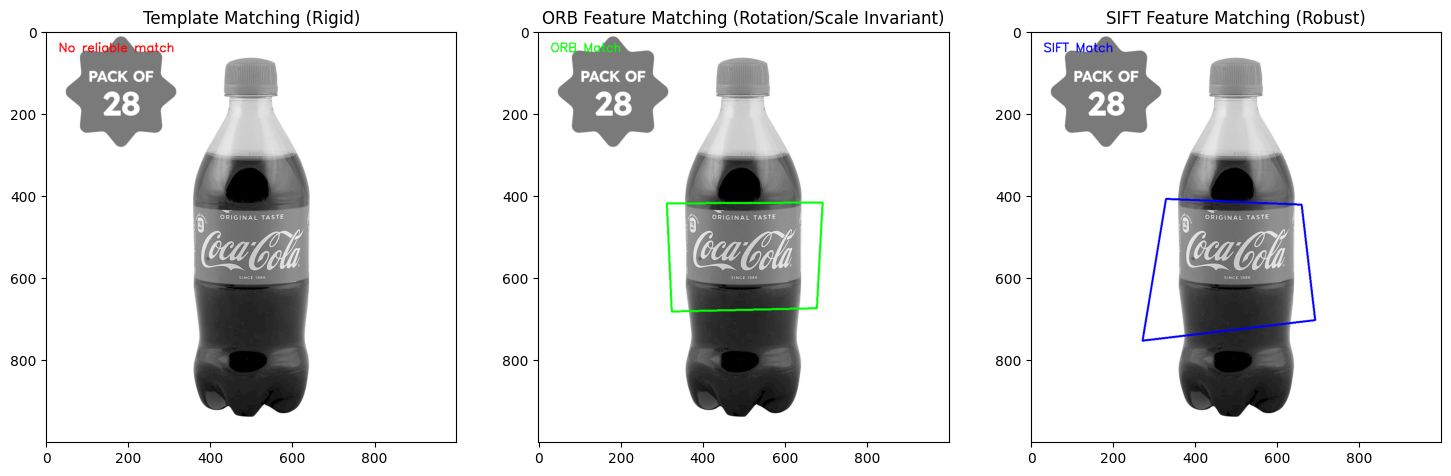

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

scene = cv2.imread("product.png", cv2.IMREAD_GRAYSCALE)
template = cv2.imread("logo.png", cv2.IMREAD_GRAYSCALE)
h, w = template.shape[:2]

res = cv2.matchTemplate(scene, template, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

output_tm = cv2.cvtColor(scene, cv2.COLOR_GRAY2BGR)
if max_val > 0.6: 
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(output_tm, top_left, bottom_right, (0,0,255), 3)
    cv2.putText(output_tm, f"Score: {max_val:.2f}", (top_left[0], top_left[1]-10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,255), 2)
else:
    cv2.putText(output_tm, "No reliable match", (30,50),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

orb = cv2.ORB_create(2000)
kp1_orb, des1_orb = orb.detectAndCompute(template, None)
kp2_orb, des2_orb = orb.detectAndCompute(scene, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches_orb = bf.match(des1_orb, des2_orb)
matches_orb = sorted(matches_orb, key=lambda x: x.distance)

output_orb = cv2.cvtColor(scene, cv2.COLOR_GRAY2BGR)
if len(matches_orb) > 10:
    src_pts = np.float32([kp1_orb[m.queryIdx].pt for m in matches_orb]).reshape(-1,1,2)
    dst_pts = np.float32([kp2_orb[m.trainIdx].pt for m in matches_orb]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    if M is not None:
        pts = np.float32([[0,0],[w,0],[w,h],[0,h]]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts, M)
        cv2.polylines(output_orb, [np.int32(dst)], True, (0,255,0), 3)
        cv2.putText(output_orb, "ORB Match", (30,50), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

sift = cv2.SIFT_create()
kp1_sift, des1_sift = sift.detectAndCompute(template, None)
kp2_sift, des2_sift = sift.detectAndCompute(scene, None)

bf_sift = cv2.BFMatcher()
matches_sift = bf_sift.knnMatch(des1_sift, des2_sift, k=2)

good_sift = []
for m, n in matches_sift:
    if m.distance < 0.75 * n.distance:
        good_sift.append(m)

output_sift = cv2.cvtColor(scene, cv2.COLOR_GRAY2BGR)
if len(good_sift) > 10:
    src_pts = np.float32([kp1_sift[m.queryIdx].pt for m in good_sift]).reshape(-1,1,2)
    dst_pts = np.float32([kp2_sift[m.trainIdx].pt for m in good_sift]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    if M is not None:
        pts = np.float32([[0,0],[w,0],[w,h],[0,h]]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts, M)
        cv2.polylines(output_sift, [np.int32(dst)], True, (255,0,0), 3)
        cv2.putText(output_sift, "SIFT Match", (30,50), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)

plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.imshow(output_tm[:,:,::-1])
plt.title("Template Matching (Rigid)")

plt.subplot(1,3,2)
plt.imshow(output_orb[:,:,::-1])
plt.title("ORB Feature Matching (Rotation/Scale Invariant)")

plt.subplot(1,3,3)
plt.imshow(output_sift[:,:,::-1])
plt.title("SIFT Feature Matching (Robust)")

plt.show()

Design a pipeline using edge detection + morphology to detect cracks or missing parts in glass bottle images. Show defect localization.

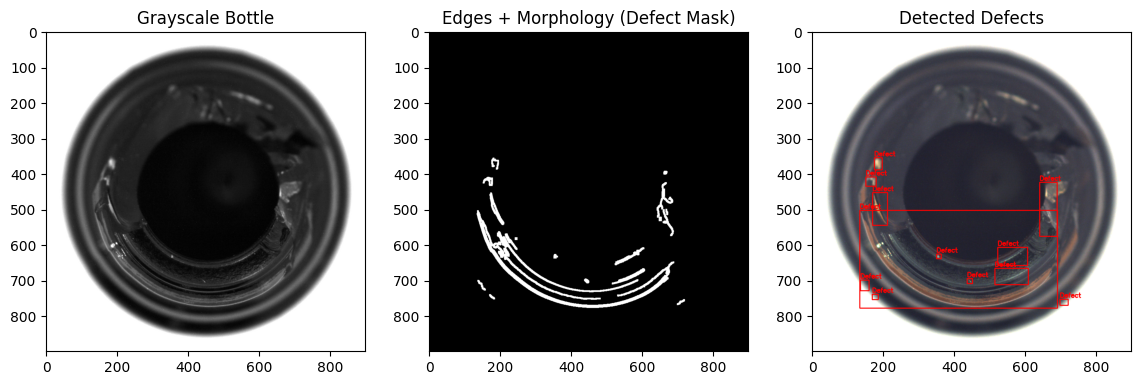

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("002.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray, (5,5), 0)

edges = cv2.Canny(blur, 50, 150)

kernel = np.ones((3,3), np.uint8)

closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel, iterations=2)

dilated = cv2.dilate(closed, kernel, iterations=2)

contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = img.copy()

for c in contours:
    area = cv2.contourArea(c)
    if area > 100:  
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(output, (x,y), (x+w,y+h), (0,0,255), 2)
        cv2.putText(output, "Defect", (x,y-5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,255), 2)

plt.figure(figsize=(14,7))
plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Bottle")

plt.subplot(1,3,2)
plt.imshow(dilated, cmap='gray')
plt.title("Edges + Morphology (Defect Mask)")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title("Detected Defects")
plt.show()

Perform defect detection on PCB images using edge detection and morphology to identify broken tracks or missing solder points. Provide annotated outputs.

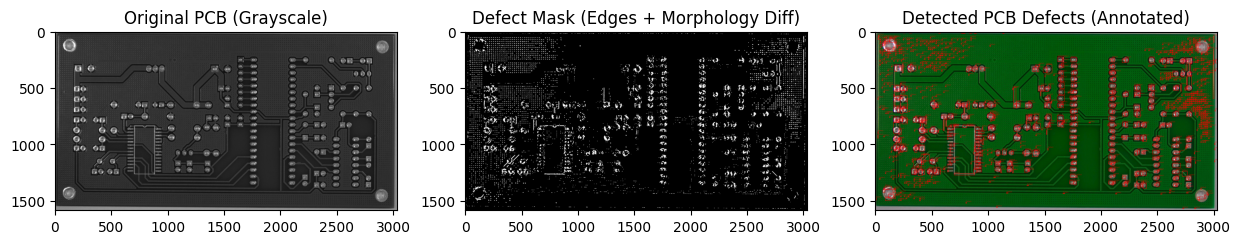

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("pcb.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray, (5,5), 0)

edges = cv2.Canny(blur, 50, 150)

kernel = np.ones((3,3), np.uint8)

closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel, iterations=2)

defect_mask = cv2.subtract(closed, edges)

defect_mask = cv2.dilate(defect_mask, kernel, iterations=1)

contours, _ = cv2.findContours(defect_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

output = img.copy()
for c in contours:
    area = cv2.contourArea(c)
    if area > 30:  
        x, y, w, h = cv2.boundingRect(c)
        cv2.rectangle(output, (x,y), (x+w,y+h), (0,0,255), 2)
        cv2.putText(output, "Defect", (x, y-5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1)

plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.title("Original PCB (Grayscale)")

plt.subplot(1,3,2)
plt.imshow(defect_mask, cmap='gray')
plt.title("Defect Mask (Edges + Morphology Diff)")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title("Detected PCB Defects (Annotated)")
plt.show()